In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils.class_weight import compute_class_weight
from random_forrest_classifier import MultiClassRandomForestClassifier
import pickle

In [2]:
rs = 20240925

In [3]:
df1 = pd.read_csv('/Volumes/Lukas_SSD/phenotyping_benchmark/datasets/Maps_data/cHL_2_MIBI/quantification/processed/kfolds/fold_1_test.csv')
df2 = pd.read_csv('/Volumes/Lukas_SSD/phenotyping_benchmark/datasets/Maps_data/cHL_2_MIBI/quantification/processed/kfolds/fold_1_train.csv')
df = pd.concat([df1, df2])
y = df['encoded_phenotype']
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weight_dict = {cls: weight for cls, weight in zip(np.unique(y), class_weights)}

# Initialize variables for storing results
max_depths = range(10, 50, 5)  # Example range from 1 to 20
accuracies = []
f1_scores = []
accuracies_train = []
f1_scores_train = []

# Iterate over different max_depth values
for max_depth in max_depths:
    cHL2 = MultiClassRandomForestClassifier(
        class_weight=class_weight_dict,
        n_jobs=-1,
        random_state=rs,
        max_depth=max_depth
    )
    cHL2.train_and_evaluate_manual(path='/Volumes/Lukas_SSD/phenotyping_benchmark/datasets/Maps_data/cHL_2_MIBI/quantification/processed/kfolds')
    
    # Record average accuracy for this max_depth
    accuracies.append(cHL2.average_accuracy)
    f1_scores.append(cHL2.average_f1_score)
    accuracies_train.append(cHL2.average_accuracy_train)
    f1_scores_train.append(cHL2.average_weighted_f1_score_train)

MultiClassRandomForestClassifier class initialized successfully with the following parameters:
  n_estimators: 100
  criterion: log_loss
  max_depth: 10
  min_samples_split: 2
  min_samples_leaf: 1
  min_weight_fraction_leaf: 0.0
  max_features: sqrt
  max_leaf_nodes: None
  min_impurity_decrease: 0.0
  bootstrap: True
  oob_score: False
  n_jobs: -1
  random_state: 20240925
  verbose: 0
  warm_start: False
  class_weight: {np.int64(0): np.float64(0.7974118280906792), np.int64(1): np.float64(0.3509036693901371), np.int64(2): np.float64(0.4814761523447275), np.int64(3): np.float64(1.4665205792682927), np.int64(4): np.float64(0.970578591606134), np.int64(5): np.float64(3.312231020829747), np.int64(6): np.float64(3.9194846200855573), np.int64(7): np.float64(0.8109563348225576), np.int64(8): np.float64(3.9387410440122825), np.int64(9): np.float64(1.1430374858908097), np.int64(10): np.float64(1.2210147226805432), np.int64(11): np.float64(2.7092016333427202)}
  ccp_alpha: 0.0
  max_samples: 

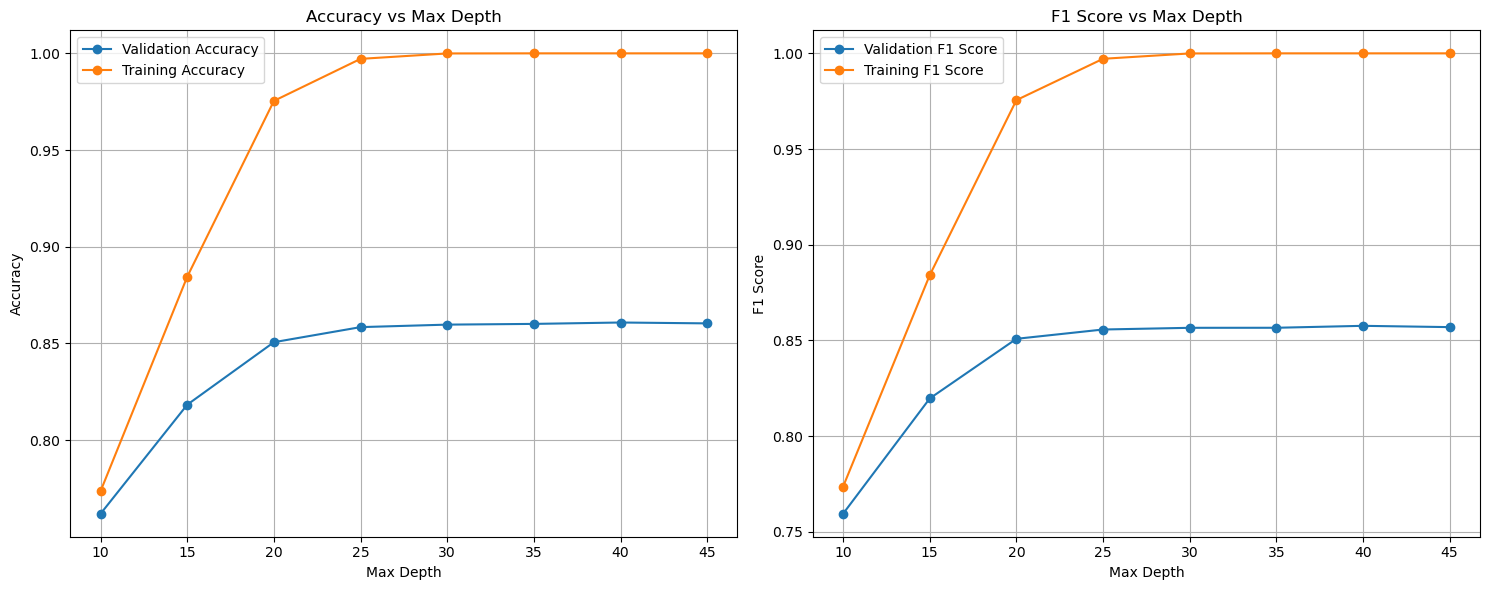

In [4]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot accuracy
ax1.plot(max_depths, accuracies, marker='o', label='Validation Accuracy')
ax1.plot(max_depths, accuracies_train, marker='o', label='Training Accuracy')
ax1.set_xlabel('Max Depth')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy vs Max Depth cHL2')
ax1.legend()
ax1.grid(True)

# Plot F1 score
ax2.plot(max_depths, f1_scores, marker='o', label='Validation F1 Score')
ax2.plot(max_depths, f1_scores_train, marker='o', label='Training F1 Score')
ax2.set_xlabel('Max Depth')
ax2.set_ylabel('F1 Score')
ax2.set_title('F1 Score vs Max Depth cHL2')
ax2.legend()
ax2.grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [7]:
# What was the max_depth that the model chose when running with None
model_filename = '/Volumes/Lukas_SSD/phenotyping_benchmark/datasets/Maps_data/cHL_2_MIBI/results_rfc/rfc_model.pkl'
with open(model_filename, 'rb') as f:
    loaded_model = pickle.load(f)

In [8]:
max((e.tree_.max_depth for e in loaded_model.estimators_))

50

In [12]:
# What was the max_depth that the model chose when running with None
model_filename = '/Volumes/Lukas_SSD/phenotyping_benchmark/datasets/Maps_data/cHL_CODEX/results_rfc/rfc_model.pkl'
with open(model_filename, 'rb') as f:
    loaded_model = pickle.load(f)

In [13]:
max((e.tree_.max_depth for e in loaded_model.estimators_))

43

In [14]:
df1 = pd.read_csv('/Volumes/Lukas_SSD/phenotyping_benchmark/datasets/Maps_data/cHL_CODEX/quantification/processed/kfolds/fold_1_test.csv')
df2 = pd.read_csv('/Volumes/Lukas_SSD/phenotyping_benchmark/datasets/Maps_data/cHL_CODEX/quantification/processed/kfolds/fold_1_train.csv')
df = pd.concat([df1, df2])
y = df['encoded_phenotype']
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weight_dict = {cls: weight for cls, weight in zip(np.unique(y), class_weights)}

# Initialize variables for storing results
max_depths = range(10, 50, 5)  # Example range from 1 to 20
accuracies = []
f1_scores = []
accuracies_train = []
f1_scores_train = []

# Iterate over different max_depth values
for max_depth in max_depths:
    cHL2 = MultiClassRandomForestClassifier(
        class_weight=class_weight_dict,
        n_jobs=-1,
        random_state=rs,
        max_depth=max_depth
    )
    cHL2.train_and_evaluate_manual(path='/Volumes/Lukas_SSD/phenotyping_benchmark/datasets/Maps_data/cHL_CODEX/quantification/processed/kfolds')
    
    # Record average accuracy for this max_depth
    accuracies.append(cHL2.average_accuracy)
    f1_scores.append(cHL2.average_f1_score)
    accuracies_train.append(cHL2.average_accuracy_train)
    f1_scores_train.append(cHL2.average_weighted_f1_score_train)

MultiClassRandomForestClassifier class initialized successfully with the following parameters:
  n_estimators: 100
  criterion: log_loss
  max_depth: 10
  min_samples_split: 2
  min_samples_leaf: 1
  min_weight_fraction_leaf: 0.0
  max_features: sqrt
  max_leaf_nodes: None
  min_impurity_decrease: 0.0
  bootstrap: True
  oob_score: False
  n_jobs: -1
  random_state: 20240925
  verbose: 0
  warm_start: False
  class_weight: {np.int64(0): np.float64(0.5220243197303619), np.int64(1): np.float64(0.2255791324000251), np.int64(2): np.float64(0.4920103516266842), np.int64(3): np.float64(22.017463235294116), np.int64(4): np.float64(0.8773172026930519), np.int64(5): np.float64(0.9712470858532959), np.int64(6): np.float64(3.75597773538558), np.int64(7): np.float64(2.2438179093293367), np.int64(8): np.float64(2.726444979797788), np.int64(9): np.float64(1.1604043209378179), np.int64(10): np.float64(2.543533658950945), np.int64(11): np.float64(1.2230154610665327), np.int64(12): np.float64(1.1520242

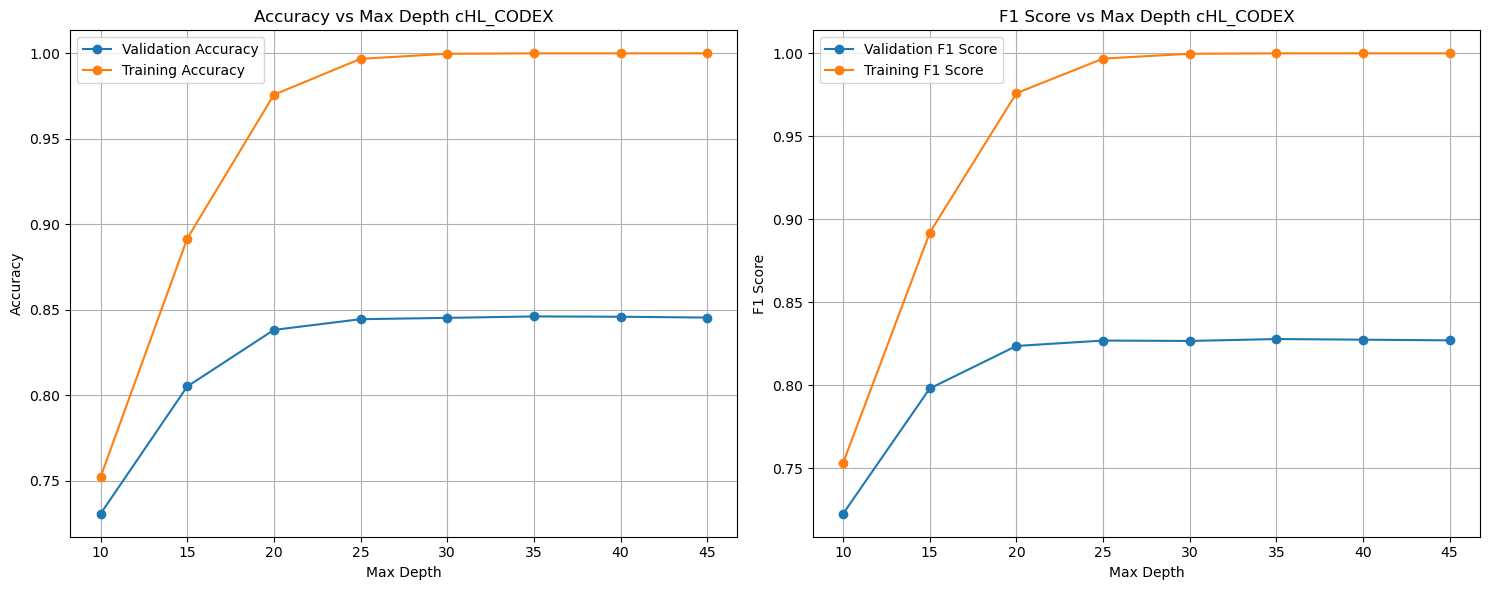

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot accuracy
ax1.plot(max_depths, accuracies, marker='o', label='Validation Accuracy')
ax1.plot(max_depths, accuracies_train, marker='o', label='Training Accuracy')
ax1.set_xlabel('Max Depth')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy vs Max Depth cHL_CODEX')
ax1.legend()
ax1.grid(True)

# Plot F1 score
ax2.plot(max_depths, f1_scores, marker='o', label='Validation F1 Score')
ax2.plot(max_depths, f1_scores_train, marker='o', label='Training F1 Score')
ax2.set_xlabel('Max Depth')
ax2.set_ylabel('F1 Score')
ax2.set_title('F1 Score vs Max Depth cHL_CODEX')
ax2.legend()
ax2.grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [18]:
df1 = pd.read_csv('/Volumes/Lukas_SSD/phenotyping_benchmark/datasets/feto_maternal/quantification/processed/kfolds_small/fold_1_test.csv')
df2 = pd.read_csv('/Volumes/Lukas_SSD/phenotyping_benchmark/datasets/feto_maternal/quantification/processed/kfolds_small/fold_1_train.csv')
df = pd.concat([df1, df2])
y = df['encoded_phenotype']
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weight_dict = {cls: weight for cls, weight in zip(np.unique(y), class_weights)}

# Initialize variables for storing results
max_depths = range(10, 50, 5)  
accuracies = []
f1_scores = []
accuracies_train = []
f1_scores_train = []

# Iterate over different max_depth values
for max_depth in max_depths:
    cHL2 = MultiClassRandomForestClassifier(
        class_weight=class_weight_dict,
        n_jobs=-1,
        random_state=rs,
        max_depth=max_depth
    )
    cHL2.train_and_evaluate_manual(path='/Volumes/Lukas_SSD/phenotyping_benchmark/datasets/feto_maternal/quantification/processed/kfolds_small')
    
    # Record average accuracy for this max_depth
    accuracies.append(cHL2.average_accuracy)
    f1_scores.append(cHL2.average_f1_score)
    accuracies_train.append(cHL2.average_accuracy_train)
    f1_scores_train.append(cHL2.average_weighted_f1_score_train)

MultiClassRandomForestClassifier class initialized successfully with the following parameters:
  n_estimators: 100
  criterion: log_loss
  max_depth: 10
  min_samples_split: 2
  min_samples_leaf: 1
  min_weight_fraction_leaf: 0.0
  max_features: sqrt
  max_leaf_nodes: None
  min_impurity_decrease: 0.0
  bootstrap: True
  oob_score: False
  n_jobs: -1
  random_state: 20240925
  verbose: 0
  warm_start: False
  class_weight: {np.int64(0): np.float64(9.886810905752265), np.int64(1): np.float64(3.1885999356292243), np.int64(2): np.float64(10.215487729428748), np.int64(3): np.float64(0.7446214576481128), np.int64(4): np.float64(0.9414847111773382), np.int64(5): np.float64(4.791721482742609), np.int64(6): np.float64(3.515756526182804), np.int64(7): np.float64(0.9800352168407724), np.int64(8): np.float64(0.12313543956221515), np.int64(9): np.float64(1.0524740147709986), np.int64(10): np.float64(3.237363571008431), np.int64(11): np.float64(1.997471651854122), np.int64(12): np.float64(0.4434589

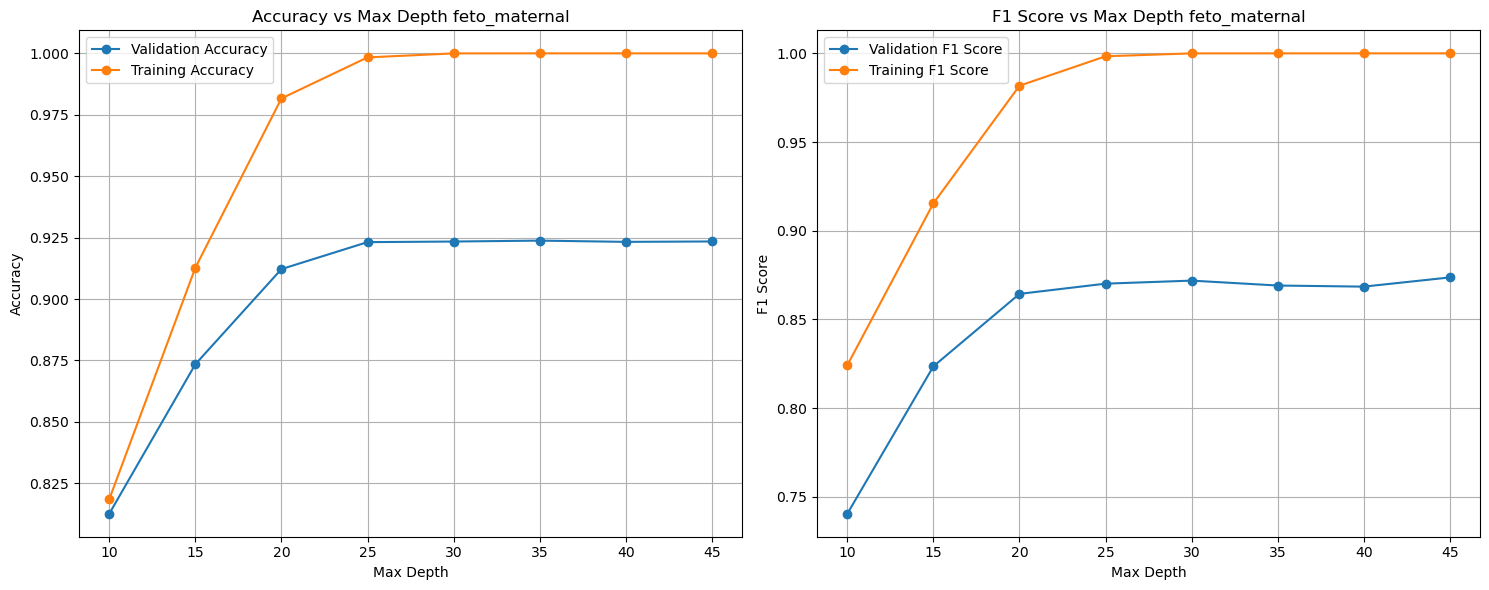

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot accuracy
ax1.plot(max_depths, accuracies, marker='o', label='Validation Accuracy')
ax1.plot(max_depths, accuracies_train, marker='o', label='Training Accuracy')
ax1.set_xlabel('Max Depth')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy vs Max Depth feto_maternal')
ax1.legend()
ax1.grid(True)

# Plot F1 score
ax2.plot(max_depths, f1_scores, marker='o', label='Validation F1 Score')
ax2.plot(max_depths, f1_scores_train, marker='o', label='Training F1 Score')
ax2.set_xlabel('Max Depth')
ax2.set_ylabel('F1 Score')
ax2.set_title('F1 Score vs Max Depth feto_maternal')
ax2.legend()
ax2.grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [20]:
# What was the max_depth that the model chose when running with None
model_filename = '/Volumes/Lukas_SSD/phenotyping_benchmark/datasets/feto_maternal/results_rfc/rfc_model.pkl'
with open(model_filename, 'rb') as f:
    loaded_model = pickle.load(f)

In [21]:
max((e.tree_.max_depth for e in loaded_model.estimators_))

61

In [22]:
df1 = pd.read_csv('/Volumes/Lukas_SSD/phenotyping_benchmark/datasets/feto_maternal/quantification/processed/kfolds_small/fold_1_test.csv')
df2 = pd.read_csv('/Volumes/Lukas_SSD/phenotyping_benchmark/datasets/feto_maternal/quantification/processed/kfolds_small/fold_1_train.csv')
df = pd.concat([df1, df2])
y = df['encoded_phenotype']
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weight_dict = {cls: weight for cls, weight in zip(np.unique(y), class_weights)}

# Initialize variables for storing results
max_depths = range(10, 60, 5)  # Example range from 1 to 20
accuracies = []
f1_scores = []
accuracies_train = []
f1_scores_train = []

# Iterate over different max_depth values
for max_depth in max_depths:
    cHL2 = MultiClassRandomForestClassifier(
        class_weight=class_weight_dict,
        n_jobs=-1,
        random_state=rs,
        max_depth=max_depth
    )
    cHL2.train_and_evaluate_manual(path='/Volumes/Lukas_SSD/phenotyping_benchmark/datasets/feto_maternal/quantification/processed/kfolds_small')
    
    # Record average accuracy for this max_depth
    accuracies.append(cHL2.average_accuracy)
    f1_scores.append(cHL2.average_f1_score)
    accuracies_train.append(cHL2.average_accuracy_train)
    f1_scores_train.append(cHL2.average_weighted_f1_score_train)

MultiClassRandomForestClassifier class initialized successfully with the following parameters:
  n_estimators: 100
  criterion: log_loss
  max_depth: 10
  min_samples_split: 2
  min_samples_leaf: 1
  min_weight_fraction_leaf: 0.0
  max_features: sqrt
  max_leaf_nodes: None
  min_impurity_decrease: 0.0
  bootstrap: True
  oob_score: False
  n_jobs: -1
  random_state: 20240925
  verbose: 0
  warm_start: False
  class_weight: {np.int64(0): np.float64(9.886810905752265), np.int64(1): np.float64(3.1885999356292243), np.int64(2): np.float64(10.215487729428748), np.int64(3): np.float64(0.7446214576481128), np.int64(4): np.float64(0.9414847111773382), np.int64(5): np.float64(4.791721482742609), np.int64(6): np.float64(3.515756526182804), np.int64(7): np.float64(0.9800352168407724), np.int64(8): np.float64(0.12313543956221515), np.int64(9): np.float64(1.0524740147709986), np.int64(10): np.float64(3.237363571008431), np.int64(11): np.float64(1.997471651854122), np.int64(12): np.float64(0.4434589

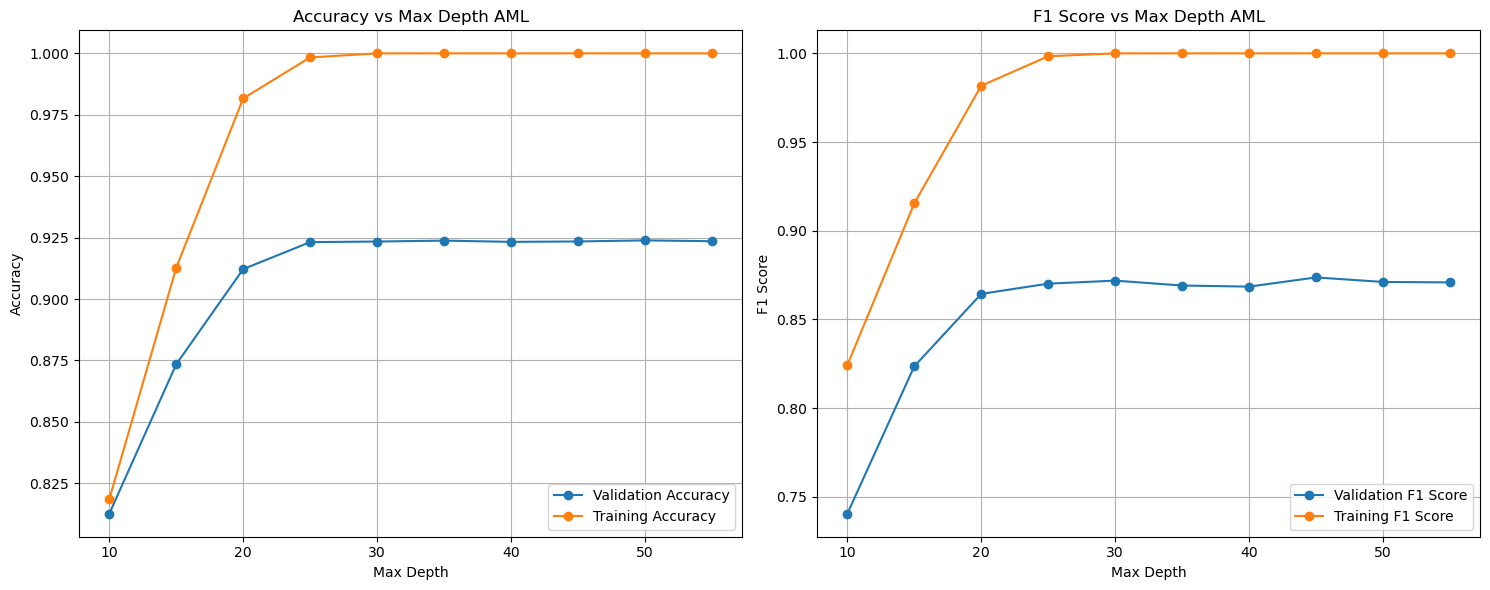

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot accuracy
ax1.plot(max_depths, accuracies, marker='o', label='Validation Accuracy')
ax1.plot(max_depths, accuracies_train, marker='o', label='Training Accuracy')
ax1.set_xlabel('Max Depth')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy vs Max Depth AML')
ax1.legend()
ax1.grid(True)

# Plot F1 score
ax2.plot(max_depths, f1_scores, marker='o', label='Validation F1 Score')
ax2.plot(max_depths, f1_scores_train, marker='o', label='Training F1 Score')
ax2.set_xlabel('Max Depth')
ax2.set_ylabel('F1 Score')
ax2.set_title('F1 Score vs Max Depth AML')
ax2.legend()
ax2.grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [24]:
# What was the max_depth that the model chose when running with None
model_filename = '/Volumes/Lukas_SSD/phenotyping_benchmark/datasets/AML_bone_marrow/quantification/AML/results_rfc/rfc_model.pkl'
with open(model_filename, 'rb') as f:
    loaded_model = pickle.load(f)

In [25]:
[max(e.tree_.max_depth for e in loaded_model.estimators_)]

[43]

In [30]:
df1 = pd.read_csv('/Volumes/Lukas_SSD/phenotyping_benchmark/datasets/feto_maternal/quantification/processed/kfolds_small/fold_1_test.csv')
df2 = pd.read_csv('/Volumes/Lukas_SSD/phenotyping_benchmark/datasets/feto_maternal/quantification/processed/kfolds_small/fold_1_train.csv')
df = pd.concat([df1, df2])
y = df['encoded_phenotype']
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weight_dict = {cls: weight for cls, weight in zip(np.unique(y), class_weights)}

# Initialize variables for storing results
n_estimators = range(50, 350, 50)
max_depth = 25  
accuracies = []
f1_scores = []
accuracies_train = []
f1_scores_train = []

# Iterate over different max_depth values
for n_estimator in n_estimators:
    cHL2 = MultiClassRandomForestClassifier(
        class_weight=class_weight_dict,
        n_jobs=-1,
        random_state=rs,
        max_depth=max_depth,
        n_estimators=n_estimator
    )
    cHL2.train_and_evaluate_manual(path='/Volumes/Lukas_SSD/phenotyping_benchmark/datasets/feto_maternal/quantification/processed/kfolds_small')
    
    # Record average accuracy for this max_depth
    accuracies.append(cHL2.average_accuracy)
    f1_scores.append(cHL2.average_f1_score)
    accuracies_train.append(cHL2.average_accuracy_train)
    f1_scores_train.append(cHL2.average_weighted_f1_score_train)

MultiClassRandomForestClassifier class initialized successfully with the following parameters:
  n_estimators: 50
  criterion: log_loss
  max_depth: 25
  min_samples_split: 2
  min_samples_leaf: 1
  min_weight_fraction_leaf: 0.0
  max_features: sqrt
  max_leaf_nodes: None
  min_impurity_decrease: 0.0
  bootstrap: True
  oob_score: False
  n_jobs: -1
  random_state: 20240925
  verbose: 0
  warm_start: False
  class_weight: {np.int64(0): np.float64(9.886810905752265), np.int64(1): np.float64(3.1885999356292243), np.int64(2): np.float64(10.215487729428748), np.int64(3): np.float64(0.7446214576481128), np.int64(4): np.float64(0.9414847111773382), np.int64(5): np.float64(4.791721482742609), np.int64(6): np.float64(3.515756526182804), np.int64(7): np.float64(0.9800352168407724), np.int64(8): np.float64(0.12313543956221515), np.int64(9): np.float64(1.0524740147709986), np.int64(10): np.float64(3.237363571008431), np.int64(11): np.float64(1.997471651854122), np.int64(12): np.float64(0.44345897

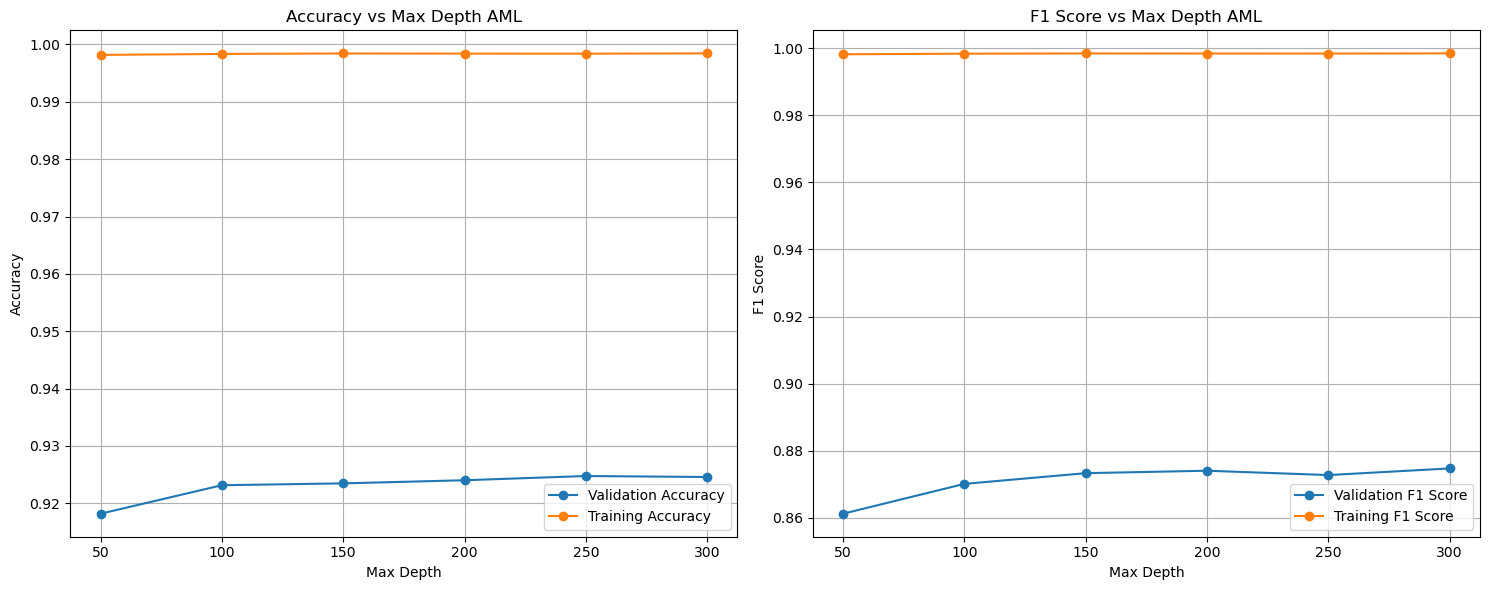

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot accuracy
ax1.plot(n_estimators, accuracies, marker='o', label='Validation Accuracy')
ax1.plot(n_estimators, accuracies_train, marker='o', label='Training Accuracy')
ax1.set_xlabel('Max Depth')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy vs Max Depth AML')
ax1.legend()
ax1.grid(True)

# Plot F1 score
ax2.plot(n_estimators, f1_scores, marker='o', label='Validation F1 Score')
ax2.plot(n_estimators, f1_scores_train, marker='o', label='Training F1 Score')
ax2.set_xlabel('Max Depth')
ax2.set_ylabel('F1 Score')
ax2.set_title('F1 Score vs Max Depth AML')
ax2.legend()
ax2.grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()